In [6]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pymc as pm
import preliz as pz

from scipy import stats

In [2]:
az.style.use("arviz-whitegrid")
plt.rc('figure', dpi=450)

In [3]:
def posterior_grid(grid_points=50, heads=6, tails=9):
    """ 
    A grid implementation for the coin-flipping problem 
    """
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1/grid_points, grid_points)  # uniform prior
    likelihood = pz.Binomial(n=heads+tails, p=grid).pdf(heads)
    posterior = likelihood * prior
    posterior /= posterior.sum() * (1/grid_points)
    return grid, posterior

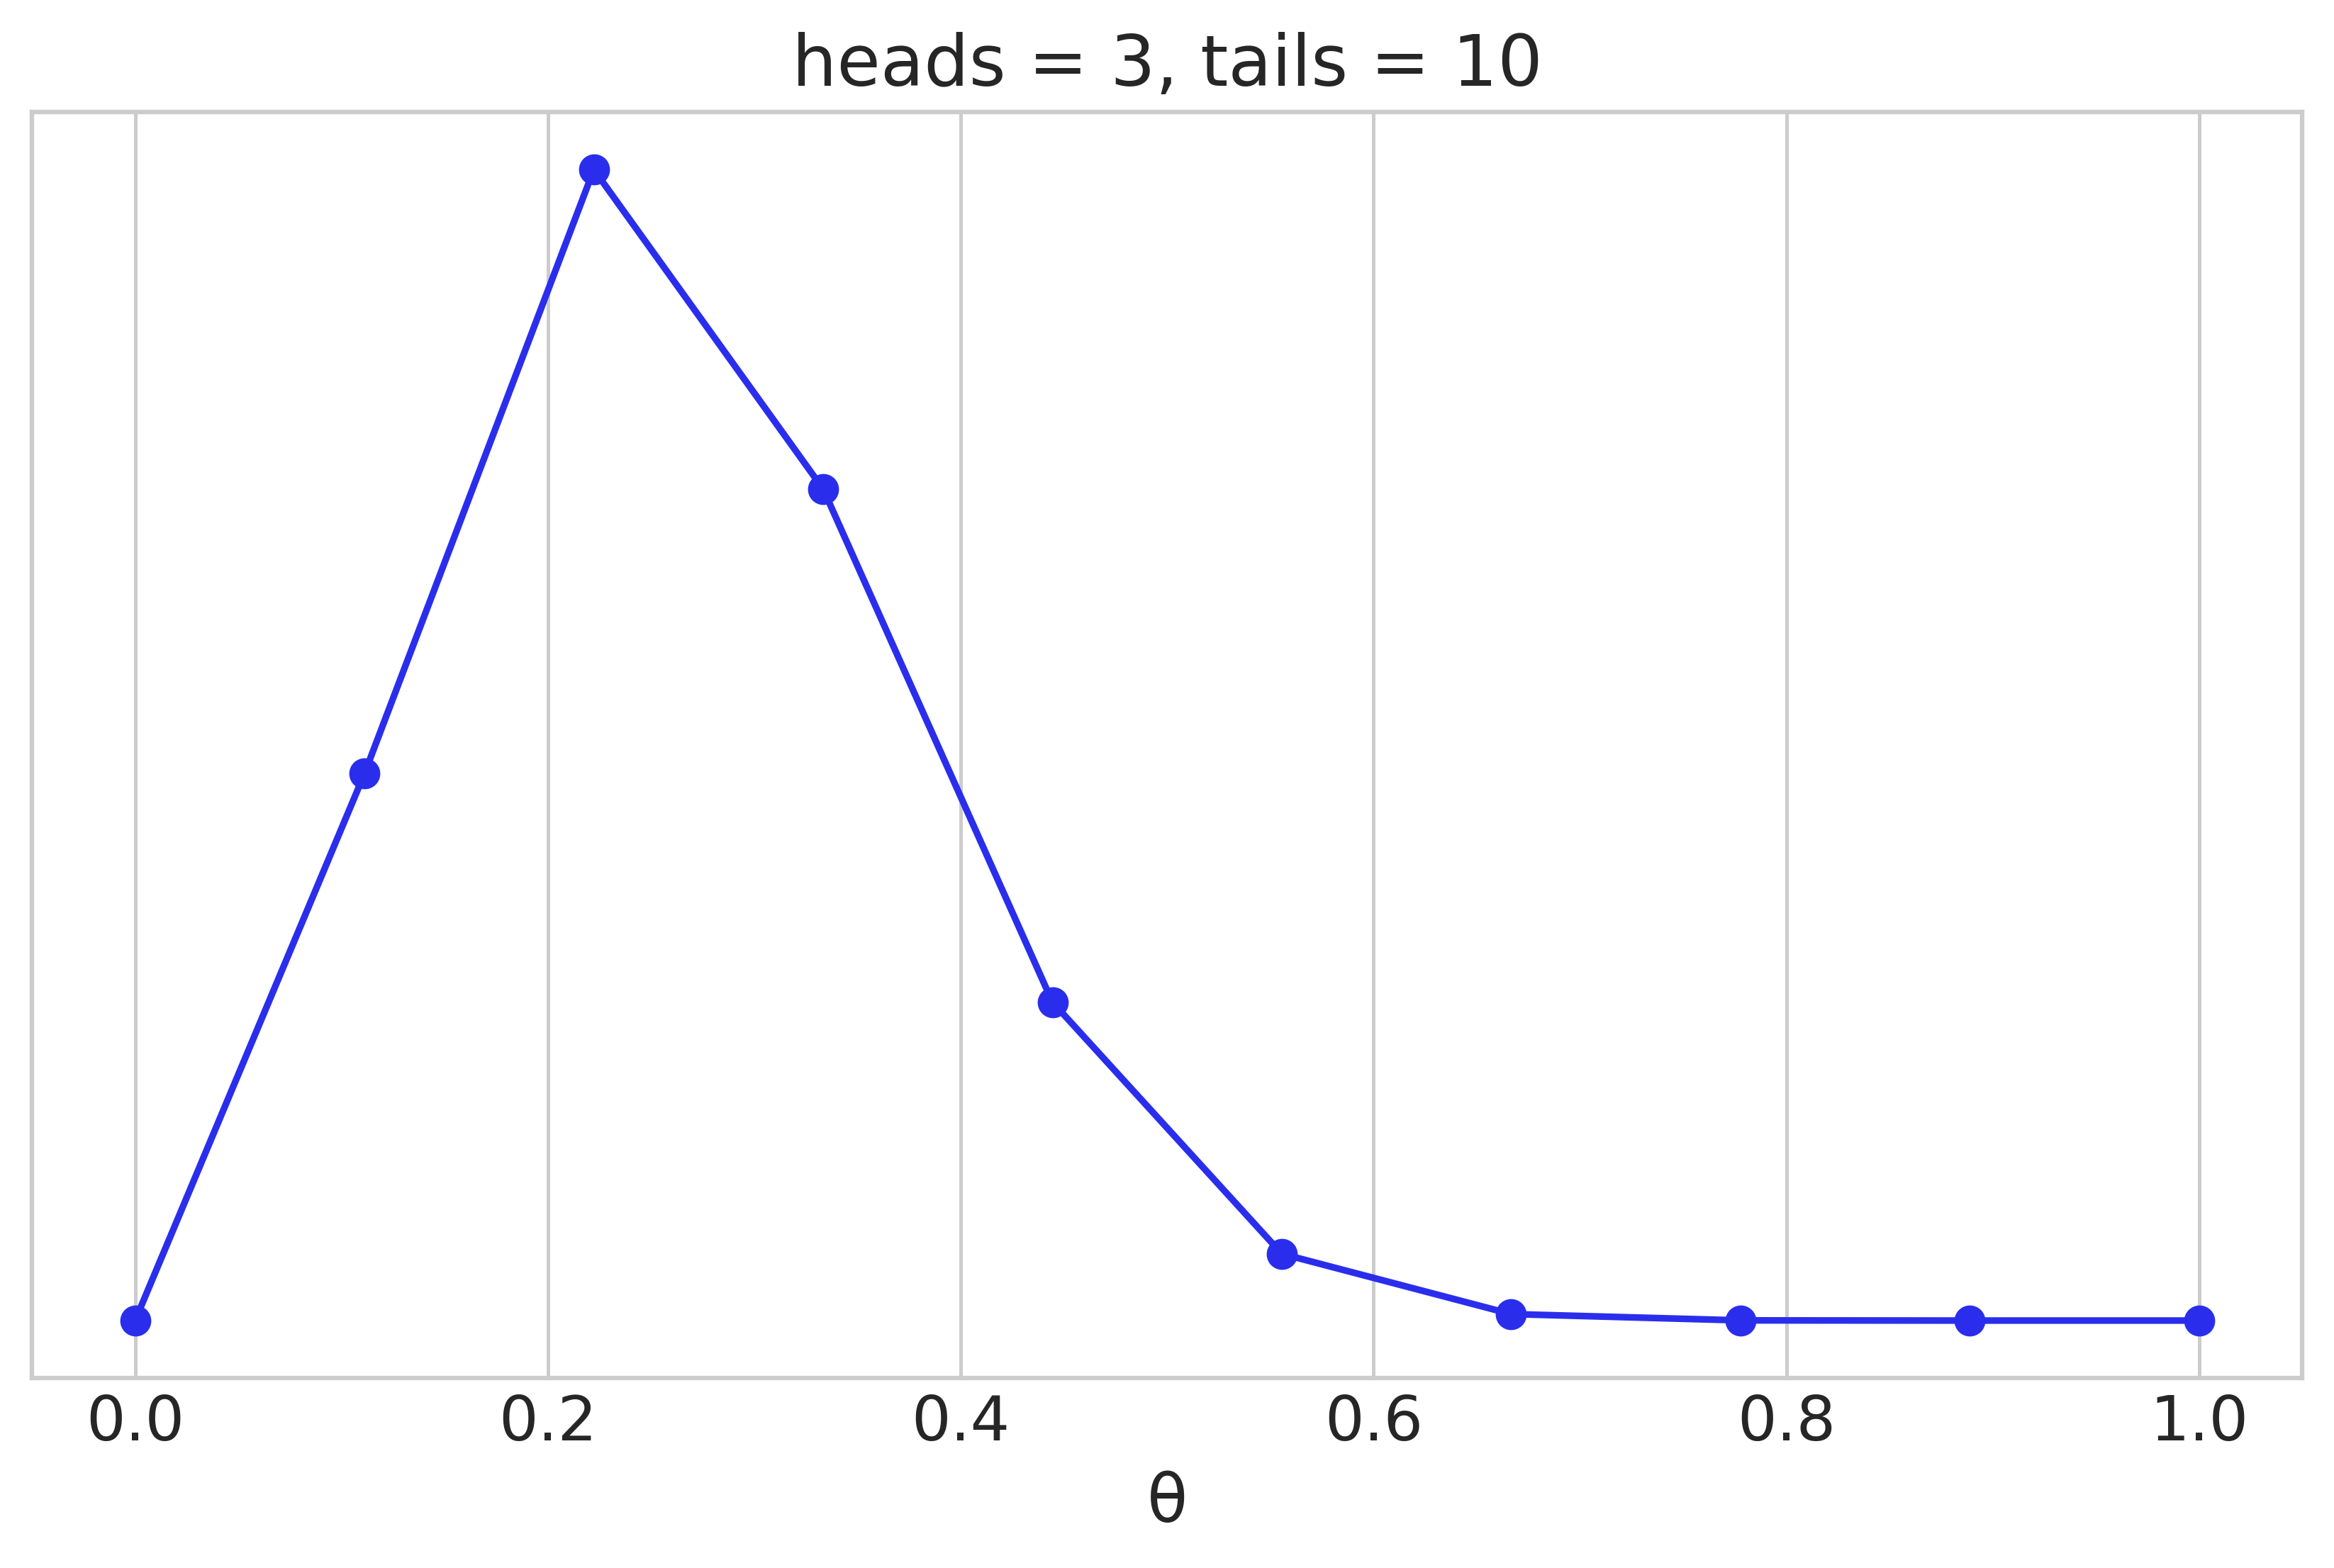

In [4]:
data = np.repeat([0, 1], (10, 3))
points = 10
h = data.sum()
t = len(data) - h
grid, posterior = posterior_grid(points, h, t) 

plt.plot(grid, posterior, 'o-')

plt.title(f'heads = {h}, tails = {t}')
plt.yticks([])
plt.xlabel('θ');

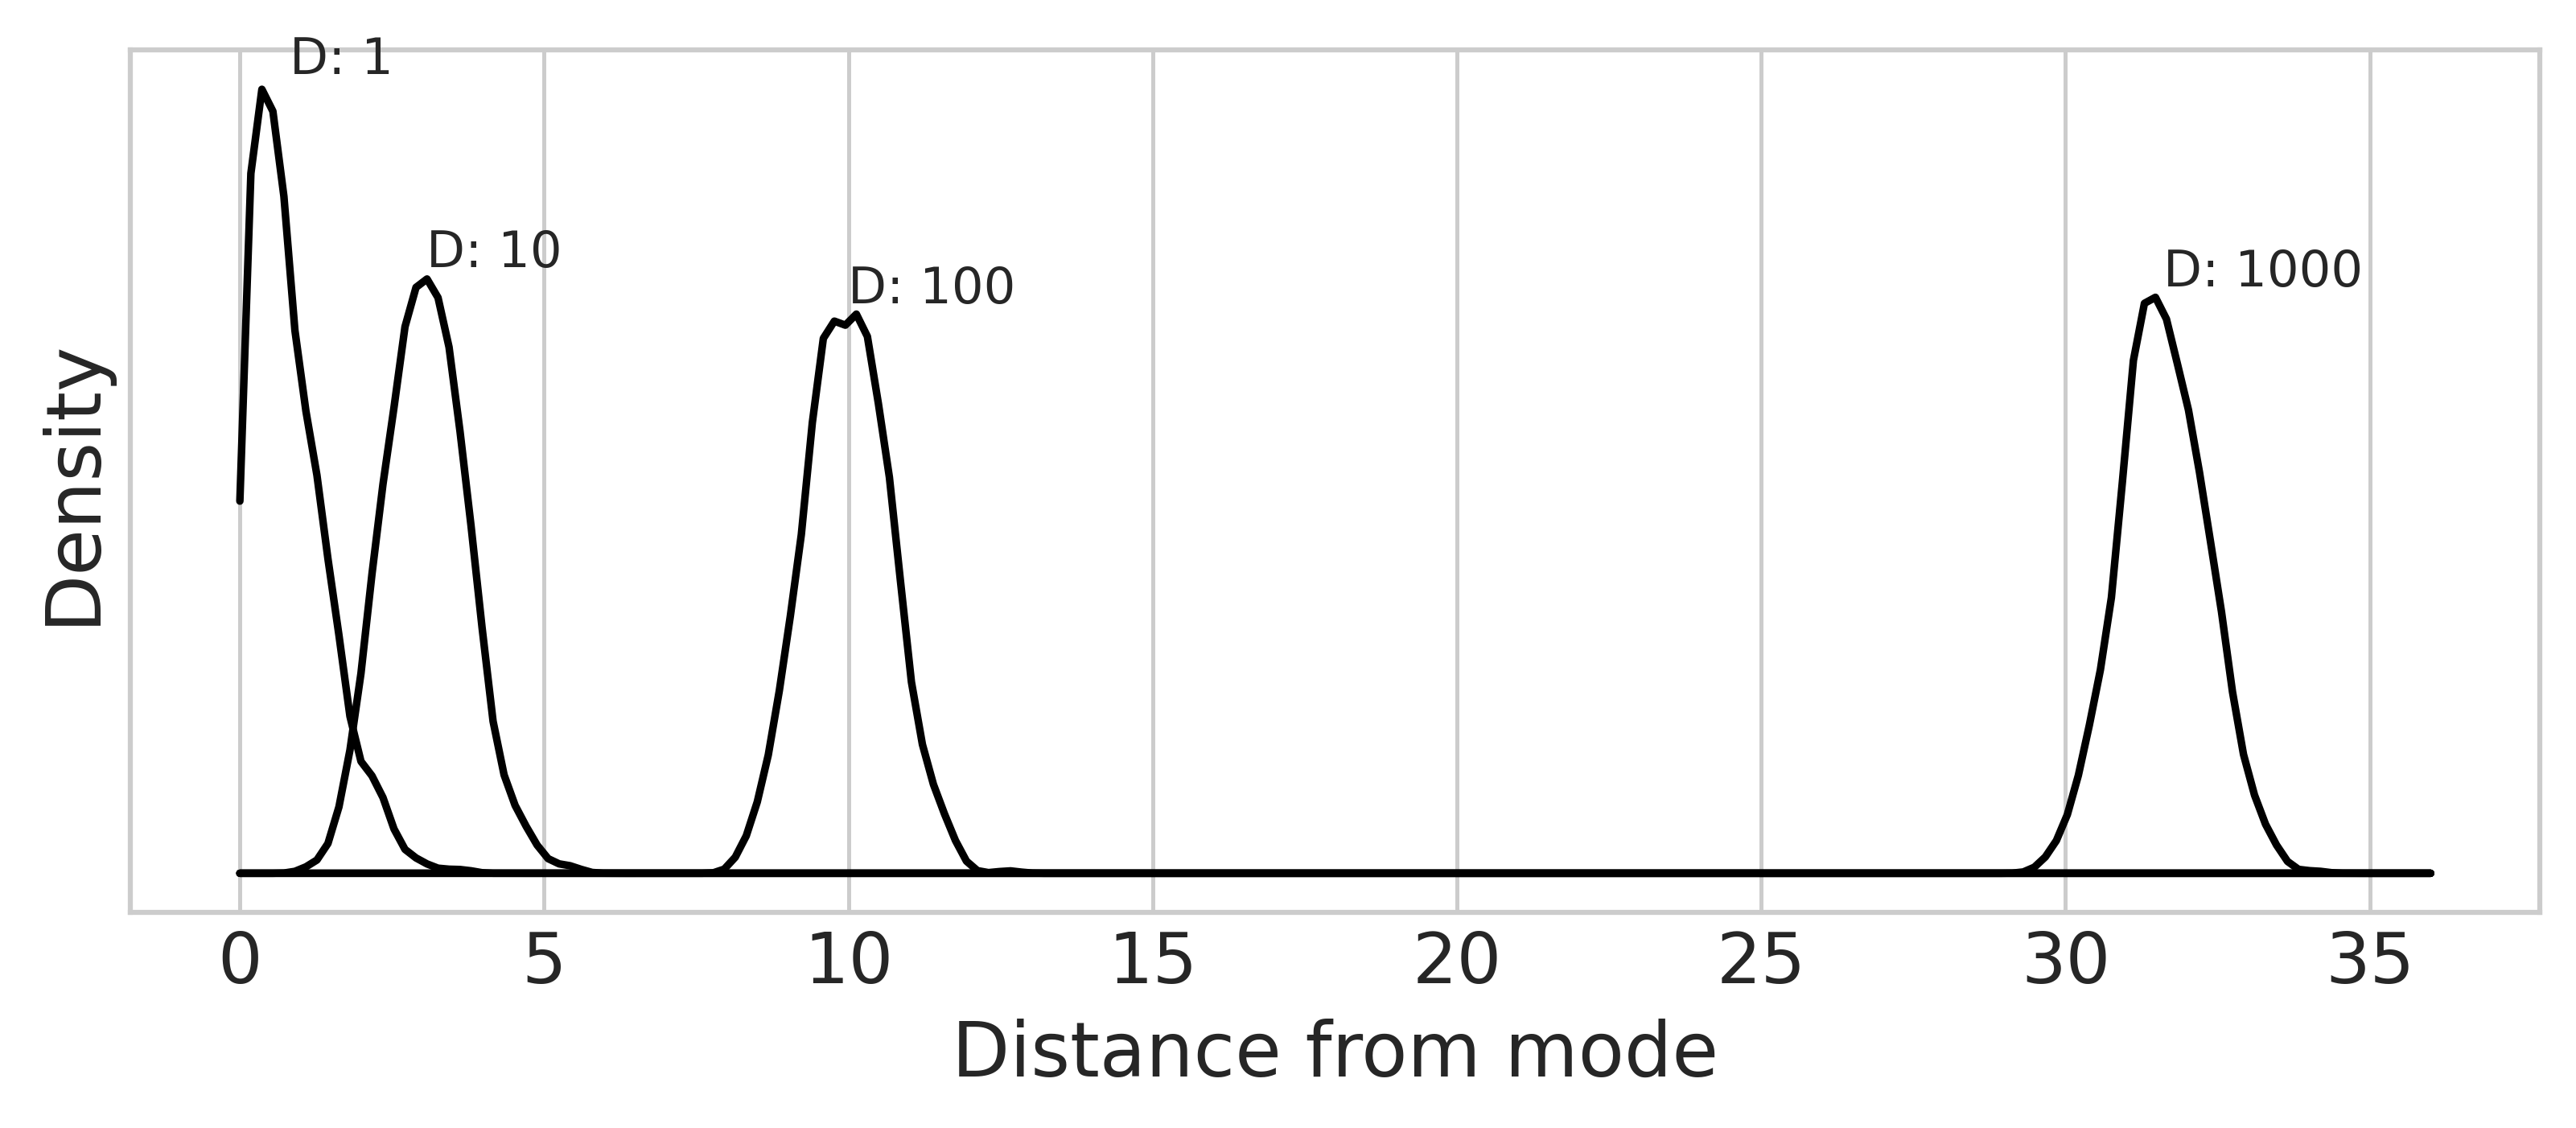

In [9]:
def rad_dist(Y):
    return np.sqrt(np.sum(Y**2))


fig, ax = plt.subplots(1, 1, figsize=[7, 3])
xvar = np.linspace(0, 36, 200)
# the book code is wrapped in a loop to reproduce Figure 9.4
for D in [1, 10, 100, 1000]:
    T = int(1e3)
    Y = stats.multivariate_normal(np.zeros(D), np.identity(D)).rvs(T)

    Rd = list(map(rad_dist, Y))

    kde = stats.gaussian_kde(Rd)
    yvar = kde(xvar)

    ax.plot(xvar, yvar, color="k")
    ax.text(np.mean(Rd), np.max(yvar) * 1.02, f"D: {D}")
    ax.set_xlabel('Distance from mode')
    ax.set_ylabel('Density')
    ax.set_yticks([])
